# Managing missing data

## Setup
### Imports

In [1]:
from pandas import DataFrame
import pandas as pd                                     # for dataset manipulation (DataFrames)
import numpy as np                                      # allows some mathematical operations
import matplotlib.pyplot as plt                         # library used to display graphs
import seaborn as sns                                   # more convenient visualisation library for dataframes
from sklearn.model_selection import train_test_split    # for classification
from sklearn.neighbors import KNeighborsClassifier      # for classification

### Loading the dataset

In [7]:
df = pd.read_csv("diabetes_data.csv")
data_columns = list(df.columns)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data preparation
### Preliminary analysis

Using what we learned last time, familiarize yourself with the diabetes dataset.
What observations can you make ? What problem do you think we are trying to solve with this data ?

In [ ]:
#La base de données nous montre une population donc on pris plusieurs éléments leur concernant afin d'étudier la possibilité ou non d'être atteint par le diabète.

*[Your answers here]*

### Objectives and baseline method
For the rest of this practical, we will use a K-nearest-neighbours (KNN) algorithm to make a diagnosis from the dataset. This means that today, the only way we can improve this diagnosis is by pre-processing the data.
The accuracy of the algorithm will be our metric to evaluate the quality of our pre-processing.

Below is the function you will need to use the algorithm. You don't need to understand it yet - it will all be explained in future lessons !

In [5]:
def split_data(data):
    X = data.drop("Outcome", axis=1)
    y = data.Outcome
    return train_test_split(X, y,
                            test_size=0.10,   # 10% of the data will be used for testing
                            random_state=42,  # ensures reproducibility of the test
                            stratify=y        # ensures the proportion of ill people is the same in the train and test sets
                            )

def print_knn_score(scores, data_type=""):
    max_score = max(scores)
    k_values_max_score = [i + 1 for i, v in enumerate(scores) if v == max_score]
    print(f'Max {data_type} score {max_score * 100} % for k = {[i for i in k_values_max_score]}')

def diagnosis_knn(data):
    """ KNN-based classification for diabetes diagnosis. """
    X_train, X_test, y_train, y_test = split_data(data)
    test_scores = []
    train_scores = []

    for k in range(1, 15):
        knn = KNeighborsClassifier(k)
        knn.fit(X_train, y_train)
        train_scores.append(knn.score(X_train, y_train))  # "score" for KNN is the accuracy of the classification
        test_scores.append(knn.score(X_test, y_test))

    print_knn_score(train_scores, "train")
    print_knn_score(test_scores, "test")

With this, we can have a "baseline" score, *i.e.* a score we can refer to in the future to see how performance evolves with our changes.

### Scaling the data

KNN is a distance-based algorithm, meaning it is can sensitive to the absolute values of the features. One possible way to counter this issue is to standardize the data (subtract mean and divide by standard deviation).

Be careful not to mix up **normalization** and **standardization**!
**Normalizing data** means dividing each value by its norm. There are several norms (l1, l2), which all have different properties.

**Normalization changes the distribution of the data**, whereas **standardization simply changes its scale**.

#### Task
Apply each of the following operations. For each of them, check how the prediction score changes, and try to interpret it.
- Standardize the data.
- Normalize the data. Make sure to use the original data, and not the standardized data!
- In a separate variable, use both standardization and normalization.
- *Bonus* : You can check out the [`scikit-learn` API](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) and use one of the other scalers listed there, such as `MinMaxScaler` or `MaxAbsScaler`. Think of use cases for these scalers.

*Hints*:
- You can either try to define these functions yourself, or you can use `scikit-learn`'s dedicated objects : [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and [`Normalizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer). Refer to the documentation for information on how to use them. Don't forget the imports!
- It is advised to create a function that will do the scaling for you. This way, you can easily scale other datasets in the rest of the practical.

In [4]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                                   # create an instance of the scaler
outcome = df["Outcome"].to_numpy()                          # we use to_numpy() to avoid problems with the index
df_std = df.drop(["Outcome"], axis=1, inplace=False)        # create a copy excluding target, axis=1 colonne et 0 ligne, inplace =false pour ne pas changer le dataframe initial
df_std = scaler.fit_transform(df_std)                       # fit the scaler prend la moyenne et l'écartype de df pour faire la standardisation par colonne
df_std = pd.DataFrame(df_std, columns=data_columns[:-1])    # transform it to dataframe conversion du tableau numpy en panda
df_std["Outcome"] = outcome                                 # add the outcome column back remise de la colonne outcome vu qu'elle était supprimé

In [261]:
df_std.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16,0.348958
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01,0.000000
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01,1.000000
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00,1.000000


In [262]:

from sklearn.preprocessing import Normalizer

scaler = Normalizer()                                   # create an instance of the scaler
outcome = df["Outcome"].to_numpy()                          # we use to_numpy() to avoid problems with the index
df_std = df.drop(["Outcome"], axis=1, inplace=False)        # create a copy excluding target, axis=1 colonne et 0 ligne, inplace =false pour ne pas changer le dataframe initial
df_std = scaler.fit_transform(df_std)                       # fit the scaler prend la moyenne et l'écartype de df pour faire la standardisation par colonne
df_std = pd.DataFrame(df_std, columns=data_columns[:-1])    # transform it to dataframe conversion du tableau numpy en panda
df_std["Outcome"] = outcome                                 # add the outcome column back remise de la colonne outcome vu qu'elle était supprimé

In [263]:
df_std.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.022645,0.682903,0.402801,0.112086,0.318921,0.186874,0.002710,0.195434,0.348958
std,0.020956,0.161166,0.153428,0.092546,0.338570,0.063402,0.001902,0.080940,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000250,0.032460,0.000000
25%,0.006476,0.587637,0.317522,0.000000,0.000000,0.146291,0.001379,0.139930,0.000000
50%,0.016716,0.704501,0.430685,0.114464,0.249215,0.186167,0.002159,0.181108,0.000000
75%,0.033330,0.801606,0.511070,0.181524,0.632833,0.226831,0.003507,0.239313,1.000000
max,0.117208,0.973682,0.848036,0.419691,0.970458,0.400734,0.013417,0.616539,1.000000


*[Your comments here]*

### Managing missing values

#### "What missing values?"

Using the functions we saw in the last practical, determine (if you have not already) whether the dataset contains missing values.
Now observe the minimum and maximum values for each feature. Does anything seem weird to you? Try to interpret the abnormalities.

In [264]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*[Your answers here]*

#### Cleaning the data

You must now have noticed that there are indeed missing values in the dataset. To avoid creating bias in the data and misleading both analysis and algorithms, it is actually better to replace those values by actual missing values, which we will manage later on.

In the code cell below, replace the missing values with `NaN` types, meaning "Not a Number".
Make sure to use the original data, not the scaled data from the previous section!
It is a good idea to scale data, but the scaling needs to be done after the cleaning. In order to compare the results with and without scaled data, you will need to re-scale the data everytime we impute a different value for `NaN`s.

*Hints*:
- Make sure to only replace values in the relevant columns!
- You can use the `replace()` function to perform the replacement
- You can indicate a `NaN` type with `np.NaN`

In [265]:
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
df[columns] = df[columns].replace(0, np.NaN) # This syntax lets you select several columns at once
# df[['column1','column2','column3']]

# Your code here

In [266]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [267]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Observe missing data

Sometimes, visualizing missing data lets you determine whether your data is missing randomly or not.
In the cell below, use a seaborn heatmap to display missing values.

<Axes: >

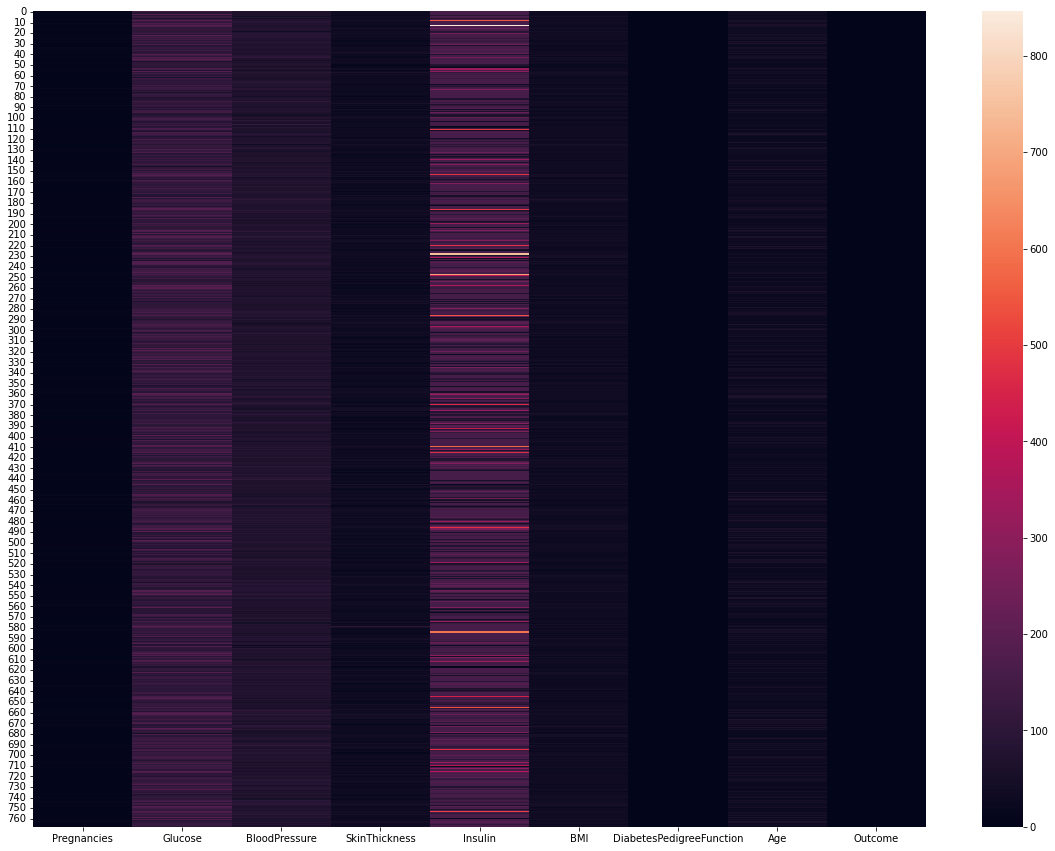

In [283]:
plt.figure(figsize=(20,15))
sns.heatmap(df)

### Deleting rows with missing values

As a first approach, try deleting rows where data is missing. How much data do you have left?
Check the new score. How do you interpret this result?

In [272]:
df_drop = df.dropna()

In [273]:
df_drop.shape

(392, 9)

In [274]:
df_init = pd.read_csv("diabetes_data.csv")
diagnosis_knn(df_init)

Max train score 100.0 % for k = [1]
Max test score 75.32467532467533 % for k = [1, 2]


### Replacing missing values

In a lot of cases, replacing the missing data can provide better classification results than simply deleting the data. In the sections below, we will test different methods for data replacement.

For each of these methods :
- Perform the replacement on the data we cleaned up
- Check how the diagnosis score evolves
- Try providing an explanation for this evolution
- Scale the data and see if there are any changes

*Hint: Pandas has a `fillna()` function!*

#### Replacing with mean values

In [284]:

# Remplacer NaN par la moyenne de chaque colonne
for col in df.columns:
    if df[col].isnull().sum() > 0:
        # Remplacer par la moyenne de la colonne
        df[col].fillna(df[col].mean(), inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [286]:

# Calculer et afficher la moyenne de chaque colonne
for col in df.columns:
    col_mean = df[col].mean()
    print(f"Moyenne de la colonne {col}: {col_mean}")

Moyenne de la colonne Pregnancies: 3.8450520833333335
Moyenne de la colonne Glucose: 121.68676277850591
Moyenne de la colonne BloodPressure: 72.40518417462482
Moyenne de la colonne SkinThickness: 29.15341959334565
Moyenne de la colonne Insulin: 155.54822335025383
Moyenne de la colonne BMI: 32.457463672391015
Moyenne de la colonne DiabetesPedigreeFunction: 0.47187630208333325
Moyenne de la colonne Age: 33.240885416666664
Moyenne de la colonne Outcome: 0.3489583333333333


#### Replacing with median values

In [287]:
for col in df.columns:
    if df[col].isnull().sum() > 0: #Vérification de la présence de valeur NaN

        # Remplacer par la médiane de la colonne
        df[col].fillna(df[col].median(), inplace=True)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [288]:

# Calculer et afficher la moyenne de chaque colonne
for col in df.columns:
    col_median = df[col].median()
    print(f"Mediane de la colonne {col}: {col_median}")

Mediane de la colonne Pregnancies: 3.0
Mediane de la colonne Glucose: 117.0
Mediane de la colonne BloodPressure: 72.20259208731241
Mediane de la colonne SkinThickness: 29.153419593345657
Mediane de la colonne Insulin: 155.5482233502538
Mediane de la colonne BMI: 32.4
Mediane de la colonne DiabetesPedigreeFunction: 0.3725
Mediane de la colonne Age: 29.0
Mediane de la colonne Outcome: 0.0


#### Replacing with random values

Here are some ways you can replace with random values:
- Replace with completely random values
- Replace with random values drawn uniformly between the minimum and maximum of each column
- Replace with random values drawn from a certain distribution for each column

*Hints*:
  - Observing the data with a `displot` (with `kind="kde"`) can help you guess what type of distribution you need
  - You can use functions such as [`numpy.random.uniform`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw random samples. Numpy has functions for many distributions, such as uniform, normal or exponential.

In [289]:
# Définir la plage de valeurs pour remplacer les NaN
min_value = {'Pregnancies': 0, 'Glucose': 44, 'BloodPressure': 24, 'SkinThickness': 7, 'Insulin': 14, 'BMI': 18.2, 'DiabetesPedigreeFunction':0.078, 'Age': 21, 'Outcome': 0}  # Valeur minimale pour la plage de valeurs aléatoires
max_value = {'Pregnancies' : 17, 'Glucose': 199, 'BloodPressure': 122, 'SkinThickness': 99, 'Insulin': 846, 'BMI': 67.1, 'DiabetesPedigreeFunction':2.42, 'Age': 81, 'Outcome': 1}  # Valeur maximale pour la plage de valeurs aléatoires

for col in df.columns:  # Parcourt chaque colonne du DataFrame
    mask = df[col].isna()  # Crée un masque pour les valeurs NaN dans la colonne
    num_nan = np.sum(mask)  # Compte le nombre de NaN dans la colonne
    replacement_values = np.random.uniform(low=min_value[col], high=max_value[col], size=num_nan)  # Génère des valeurs aléatoires entre le min et max spécifiques à chaque colonne
    df.loc[mask, col] = replacement_values  # Remplace les NaN par les valeurs aléatoires dans la colonne

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [290]:
df.max()

Pregnancies 17.00
Glucose 199.00
BloodPressure 122.00
SkinThickness 99.00
Insulin 846.00
BMI 67.10
DiabetesPedigreeFunction 2.42
Age 81.00
Outcome 1.00
dtype: float64

In [291]:
df.min()

Pregnancies 0.000
Glucose 44.000
BloodPressure 24.000
SkinThickness 7.000
Insulin 14.000
BMI 18.200
DiabetesPedigreeFunction 0.078
Age 21.000
Outcome 0.000
dtype: float64

*[Your comments here]*

#### Scikit learn imputation

For this step, you can try using `scikit-learn`'s `SimpleImputer`, `KNN-Imputer` and / or `IterativeImputer`. Make sure you refer to the documentation to parametrize the imputers!

In [292]:
from sklearn.impute import SimpleImputer

# Remplacer les valeurs NaN par la moyenne des colonnes
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Afficher le DataFrame avec les valeurs imputées
diagnosis_knn(df_imputed)
df_imputed

Max train score 100.0 % for k = [1]
Max test score 74.02597402597402 % for k = [1]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1.0


In [294]:
from sklearn.impute import KNNImputer

# Charger les données dans le DataFrame df

# Créer une instance de l'imputateur KNN avec le nombre de voisins à considérer (k)
knn_imputer = KNNImputer(n_neighbors=5)  # Vous pouvez changer le nombre de voisins selon vos besoins

# Imputer les valeurs manquantes en utilisant l'imputation KNN
df_imputed_knn = knn_imputer.fit_transform(df)

# Transformer le résultat en DataFrame avec les noms de colonnes d'origine
df_imputed_knn = pd.DataFrame(df_imputed_knn, columns=df.columns)

# Afficher le DataFrame avec les valeurs imputées
df_imputed_knn

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1.0


*[Your comments here]*

#### Mixing and matching

You are not obligated to use the same pre-processing for every column. In the cell below, try combining different methods in order to get the best classification possible.

In [295]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Utilisation d'IterativeImputer pour remplacer les NaN
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)
imputed_data = imputer.fit_transform(df)

# Crée un nouveau DataFrame avec les valeurs imputées
df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

df_imputed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1.0


*[Your comments here]*